In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as lm

In [2]:
df = pd.read_csv('data/salary_data.csv')

In [3]:
df.head()

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [5]:
X = std_scaler.fit_transform(df['experience'].values.reshape(-1, 1))
y = mm_scaler.fit_transform(df['salary'].values.reshape(-1, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)

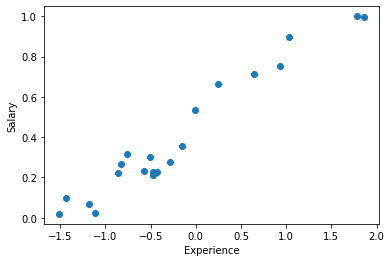

In [7]:
plt.scatter(X_train, y_train)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [8]:
class LinearRegression:
    def __init__(self):
        # attributes
        self.weights = None
        self.bias = None

        self.losses = []

    def __slope(self, x, w, b):
        '''
		performs slope calculation y = m * x + b
		x = Input Features
		w = Weights
		b = Bias
		'''
        return np.matmul(x, w) + b

    def __loss(self, x, y, w, b):
        '''
		computes Mean Sqared Error for given X & y per iteration
		'''
        loss = 0
        pred = self.__slope(x, w, b)
        loss = np.square((y - pred)).mean(axis=0)
        return loss

    def __optimizer(self, x, y, w, b, learning_rate):
        '''
		performs Gradient Descent to optimize Weights & Bias paramters per iteration
		'''
        dw, db = 0, 0

        dw += - (2 * np.dot((y - self.__slope(x, w, b)).transpose(), x)).reshape(w.shape)
        db += - (2 * (y - self.__slope(x, w, b))).mean().reshape(b.shape)

        # m*n n*k = m*k
        w -= learning_rate * dw.reshape(x.shape[1], 1)
        b -= learning_rate * db

        return w, b    

    def fit(self, X, y, epochs=30, learning_rate=0.1, batch_size=8, interval=1):
        '''
		Training function
		'''
		# Initialize/Sample weights and biases from a random normal distribution
		# Xavier Initialization
		# Square Root(6 / (1.0 + input features + output features))
        lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 1.0))

        w = np.random.uniform(low = -lim, high = lim, size=(X.shape[1], 1))
        b = np.random.uniform(low = -lim, high = lim, size=1)[0]

        num_samples = len(X)
        
        # Train the model for given epochs in batches
        for i in range(epochs):
            # create batches
            # [1, 2, 3, 4, 5, 6]
            # [1, 2] [3, 4] [5, 6]
            for offset in range(0, num_samples, batch_size):
                # create batches 
                end = offset + batch_size
                batch_x, batch_y = X[offset:end], y[offset:end]

                # calculate loss
                loss = self.__loss(batch_x, batch_y, w, b)

                # perform Gradient Descent to optimize Weights & Biases	
                w, b = self.__optimizer(batch_x, batch_y, w, b, learning_rate)
            
            # store losses as an array
            self.losses.append(loss)

            # Display training loss based on interval value
            if((i==0) or (i==(epochs-1) or (i % interval) == 0)):
                print(f"Epoch {i+1}, Loss: {loss[0]:.4f}")

        self.weights = w
        self.bias = b        

    def predict(self, x):
        '''
		returns predicted values when input with new data points
		'''
        if self.weights is not None:
            return np.matmul(x, self.weights) + self.bias

        else:
            lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 1.0))

            w = np.random.uniform(low = -lim, high = lim, size=(X.shape[1], 1))
            b = np.random.uniform(low = -lim, high = lim, size=1)[0]

            return np.matmul(x, w) + b

In [9]:
model = LinearRegression()

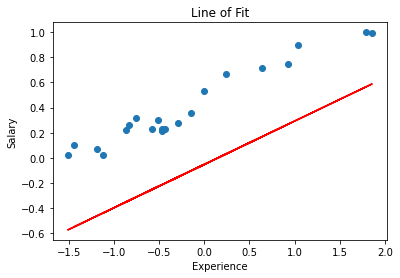

In [10]:
line = model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Line of Fit')
plt.show()

In [11]:
model.fit(X_train, y_train, epochs=100, learning_rate=0.1, interval=10)

Epoch 1, Loss: 0.7182
Epoch 11, Loss: 0.0078
Epoch 21, Loss: 0.0078
Epoch 31, Loss: 0.0078
Epoch 41, Loss: 0.0078
Epoch 51, Loss: 0.0078
Epoch 61, Loss: 0.0078
Epoch 71, Loss: 0.0078
Epoch 81, Loss: 0.0078
Epoch 91, Loss: 0.0078
Epoch 100, Loss: 0.0078


In [12]:
line = model.predict(X_train)

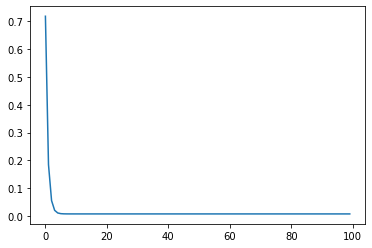

In [13]:
plt.plot(model.losses)
plt.show()

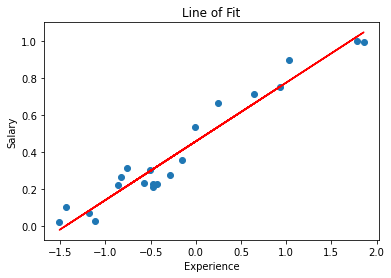

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_train, line, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Line of Fit')
plt.show()

In [15]:
sk_model = lm()

In [16]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
sk_line = sk_model.predict(X_train)

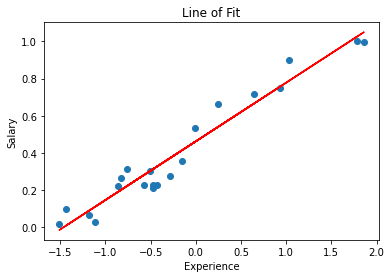

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, sk_line, c='r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Line of Fit')
plt.show()

In [19]:
t_pred = model.predict(X_test)

In [20]:
print(f"My loss: {mse(t_pred, y_test):.4f}")

My loss: 0.0023


In [21]:
sk_pred = sk_model.predict(X_test)

In [22]:
print(f"SK loss: {mse(sk_pred, y_test):.4f}")

SK loss: 0.0025


In [23]:
new_df = pd.read_csv('data/Ecommerce Customers')

In [24]:
new_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
X = std_scaler.fit_transform(new_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values)
y = mm_scaler.fit_transform(new_df['Yearly Amount Spent'].values.reshape(-1, 1))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
m_model = LinearRegression()

In [35]:
m_model.fit(X_train, y_train, epochs=100, batch_size=8, learning_rate=0.01, interval=10)

Epoch 1, Loss: 0.0652
Epoch 11, Loss: 0.0004
Epoch 21, Loss: 0.0004
Epoch 31, Loss: 0.0004
Epoch 41, Loss: 0.0004
Epoch 51, Loss: 0.0004
Epoch 61, Loss: 0.0004
Epoch 71, Loss: 0.0004
Epoch 81, Loss: 0.0004
Epoch 91, Loss: 0.0004
Epoch 100, Loss: 0.0004


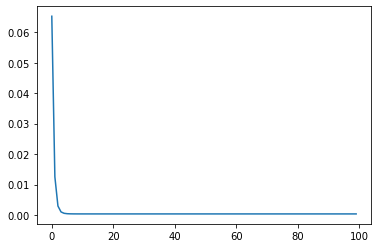

In [36]:
plt.plot(m_model.losses)
plt.show()

In [37]:
t_pred = m_model.predict(X_test)
print(f"My loss: {mse(t_pred, y_test):.4f}")

My loss: 0.0004


In [38]:
sk_model = lm()

In [39]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
sk_pred = sk_model.predict(X_test)
print(f"Sk loss: {mse(sk_pred, y_test):.4f}")

Sk loss: 0.0004


In [41]:
class LogisticRegression:
    def __init__(self):
        # attributes
        self.weights = None
        self.bias = None

        self.losses = []

    def __slope(self, x, w, b):
        '''
		performs slope calculation y = m * x + b
		x = Input Features
		w = Weights
		b = Bias
		'''
        return np.matmul(x, w) + b
    
    def __sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def __loss(self, x, y, w, b):
        '''
		computes Mean Sqared Error for given X & y per iteration
		'''
        z = self.__sigmoid(self.__slope(x, w, b))
        loss = (y * np.log(1e-15 + z)) + ((1-y) * np.log(1-(1e-15 + z)))
        return -loss.mean(axis=0)

    def __optimizer(self, x, y, w, b, learning_rate):
        '''
		performs Gradient Descent to optimize Weights & Bias paramters per iteration
		'''
        dw, db = 0, 0

        z = self.__sigmoid(self.__slope(x, w, b))
        dw += np.dot(x.transpose(), (z-y))
        db += np.mean((z-y))

        # m*n n*k = m*k
        w -= learning_rate * dw.reshape(x.shape[1], 1)
        b -= learning_rate * db

        return w, b    

    def fit(self, X, y, epochs=30, learning_rate=0.1, batch_size=8, interval=1):
        '''
		Training function
		'''
		# Initialize/Sample weights and biases from a random normal distribution
		# Xavier Initialization
		# Square Root(6 / (1.0 + input features + output features))
        lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 1.0))

        w = np.random.uniform(low = -lim, high = lim, size=(X.shape[1], 1))
        b = np.random.uniform(low = -lim, high = lim, size=1)[0]

        num_samples = len(X)
        
        # Train the model for given epochs in batches
        for i in range(epochs):
            # create batches
            # [1, 2, 3, 4, 5, 6]
            # [1, 2] [3, 4] [5, 6]
            for offset in range(0, num_samples, batch_size):
                # create batches 
                end = offset + batch_size
                batch_x, batch_y = X[offset:end], y[offset:end]

                # calculate loss
                loss = self.__loss(batch_x, batch_y, w, b)

                # perform Gradient Descent to optimize Weights & Biases	
                w, b = self.__optimizer(batch_x, batch_y, w, b, learning_rate)
            
            # store losses as an array
            self.losses.append(loss)

            # Display training loss based on interval value
            if((i==0) or (i==(epochs-1) or (i % interval) == 0)):
                print(f"Epoch {i+1}, Loss: {loss[0]:.4f}")

        self.weights = w
        self.bias = b        

    def predict(self, x, threshold=0.5):
        '''
		returns predicted values when input with new data points
		'''
        if self.weights is not None:
            return np.matmul(x, self.weights) + self.bias >= 0.5 

        else:
            lim = np.sqrt(6.0 / (X.shape[0] + X.shape[1] + 1.0))

            w = np.random.uniform(low = -lim, high = lim, size=(X.shape[1], 1))
            b = np.random.uniform(low = -lim, high = lim, size=1)[0]

            return np.matmul(x, w) + b

In [42]:
df = pd.read_csv('data/binary.csv')

In [43]:
X = std_scaler.fit_transform(df['score'].values.reshape(-1, 1))
y = df['target'].values.reshape(-1, 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train, epochs=1000, interval=100, learning_rate=0.01)

Epoch 1, Loss: 0.4840
Epoch 101, Loss: 0.3381
Epoch 201, Loss: 0.3409
Epoch 301, Loss: 0.3347
Epoch 401, Loss: 0.3248
Epoch 501, Loss: 0.3141
Epoch 601, Loss: 0.3037
Epoch 701, Loss: 0.2939
Epoch 801, Loss: 0.2849
Epoch 901, Loss: 0.2765
Epoch 1000, Loss: 0.2689


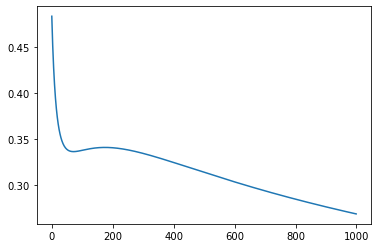

In [54]:
plt.plot(model.losses)
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
pred = model.predict(X_test)
print(confusion_matrix(pred, y_test))
print(f'Accuracy: {np.sum(pred==y_test)/len(y_test):.4f}')

[[2 3]
 [0 4]]
Accuracy: 0.6667


In [57]:
from sklearn.linear_model import LogisticRegression as logm

In [58]:
sk_model = logm()

In [59]:
sk_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
pred = sk_model.predict(X_test).reshape(-1, 1)
print(confusion_matrix(pred, y_test))
print(f'SK Accuracy: {np.sum(pred==y_test)/len(y_test):.4f}')

[[2 3]
 [0 4]]
SK Accuracy: 0.6667


In [62]:
df = pd.read_csv('data/advertising.csv')

In [63]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [64]:
X = std_scaler.fit_transform(df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']].values)
y = df['Clicked on Ad'].values.reshape(-1, 1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train, epochs=1000, interval=100, learning_rate=0.01)

Epoch 1, Loss: 0.0999
Epoch 101, Loss: 0.0204
Epoch 201, Loss: 0.0192
Epoch 301, Loss: 0.0187
Epoch 401, Loss: 0.0185
Epoch 501, Loss: 0.0185
Epoch 601, Loss: 0.0184
Epoch 701, Loss: 0.0184
Epoch 801, Loss: 0.0184
Epoch 901, Loss: 0.0184
Epoch 1000, Loss: 0.0184


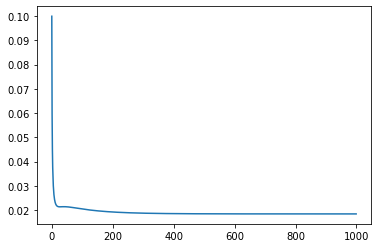

In [68]:
plt.plot(model.losses)
plt.show()

In [69]:
pred = model.predict(X_test)
print(confusion_matrix(pred, y_test))
print(f'Accuracy: {np.sum(pred==y_test)/len(y_test):.4f}')

[[149   6]
 [  2 143]]
Accuracy: 0.9733


In [70]:
sk_model = logm()

In [71]:
sk_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred = sk_model.predict(X_test).reshape(-1, 1)
print(confusion_matrix(pred, y_test))
print(f'SK Accuracy: {np.sum(pred==y_test)/len(y_test):.4f}')

[[148   5]
 [  3 144]]
SK Accuracy: 0.9733


In [89]:
class Linear:
    def __init__(self, in_feat, out_feat, name='linear'):
        self.name = name

        self.lim = np.sqrt(6.0 / (in_feat + out_feat + 1.0))

        self.weights = np.random.uniform(low= -self.lim, high=self.lim, size=(in_feat, out_feat))
        self.bias = np.random.uniform(low= -self.lim, high=self.lim, size=out_feat)

        self.trainable = True

        self.parameters = {'weights': self.weights, 'bias': self.bias}

    def forward(self, inputs):
        return np.matmul(inputs, self.weights) + self.bias

    def backward(self, inputs, grad_loss, learning_rate):
        new_grad_loss = np.dot(grad_loss, self.weights.transpose())

        dw = np.dot(inputs.transpose(), grad_loss).reshape(self.weights.shape)
        db = np.mean(grad_loss).reshape(self.bias.shape)

        self.weights -= learning_rate * dw
        self.bias -= learning_rate * db

        return new_grad_loss     

In [74]:
df = pd.read_csv('data/salary_data.csv')

In [75]:
X = std_scaler.fit_transform(df['experience'].values.reshape(-1, 1))
y = mm_scaler.fit_transform(df['salary'].values.reshape(-1, 1))

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [77]:
def mse(y_true, y_pred):
    return np.square((y_true - y_pred)).mean(axis=0)

In [78]:
def grad_mse(y_true, y_pred):
    return -(2 * (y_true - y_pred))

In [82]:
def train(model, X, y, epochs=30, learning_rate=0.1, batch_size=32, interval=1):
    num_samples = len(X)

    losses = []

    for i in range(epochs):
        for offset in range(0, num_samples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X[offset:end], y[offset:end]

            pred = model.forward(batch_x)

            loss = mse(batch_y, pred)

            grad_loss = grad_mse(batch_y, pred)

            back_grad = model.backward(batch_x, grad_loss, learning_rate)

        losses.append(loss)

        if((i==0) or (i==(epochs-1)) or (i%interval==0)):
            print(f"Epoch {i+1}, Loss: {loss[0]:.4f}")

    return losses      

In [90]:
model = Linear(1, 1)

In [91]:
losses = train(model, X_train, y_train, epochs=30, interval=10, batch_size=8)

Epoch 1, Loss: 0.0067
Epoch 11, Loss: 0.0045
Epoch 21, Loss: 0.0045
Epoch 30, Loss: 0.0045


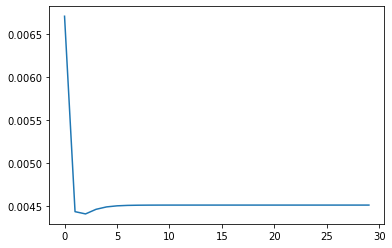

In [92]:
plt.plot(losses)
plt.show()